In [27]:
import cv2
from cv2 import imread
from cv2 import CascadeClassifier
import matplotlib.pyplot as plt
from nptyping import NDArray, Bool
from abc import ABC, abstractmethod
from typing import List
import os
import urllib.request

In [53]:
class ImReader(ABC):
    @abstractmethod
    def read(self) -> NDArray:
        raise NotImplementedError
        
    def show(self):
        if hasattr(self,'img'):
            plt.imshow(self.img)
            plt.show()

class JPGReader(ImReader):

    def __init__(self, path = None):
        self.path = path

    def read(self):
        if self.path is None:
            raise ValueError("JPG reader missing attribute `path`, use `set_path` method.")

        img = imread(self.path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.img = img
        return img

    def set_path(self, path):
        self.path = path
        return self

class FaceBoxFinder(ABC):
    @abstractmethod
    def detect(self, img:NDArray) -> List[List]:
        raise NotImplementedError

    def draw(self, img:NDArray) -> NDArray:
        boxes = self.detect(img)

        for x, y, width, height in boxes:
            x2, y2 = x + width, y + height
            img = cv2.rectangle(img, (x, y), (x2, y2), (0,0,255), 1)

        return img


class CascadeFinder(FaceBoxFinder):

    MODEL_URL = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

    def __init__(self, model_path = None, model_file_name = None):
        self.path = model_path if model_path \
                    else "./resources/cascade_model"

        self.model_file_name = model_file_name if model_file_name  \
                    else 'haarcascade_frontalface_default.xml'

        self.file_path = os.path.join(self.path, self.model_file_name)

        self._post_init()

    def _post_init(self):
        if not os.path.exists(self.path):
            os.makedirs(self.path)

        if not os.path.exists(self.file_path):
            urllib.request.urlretrieve(CascadeFinder.MODEL_URL, self.file_path)

        self.classifier = CascadeClassifier(self.file_path)  

    def detect(self, img:NDArray) -> List[List]:
        return self.classifier.detectMultiScale(img)




In [54]:
face_finder = CascadeFinder()

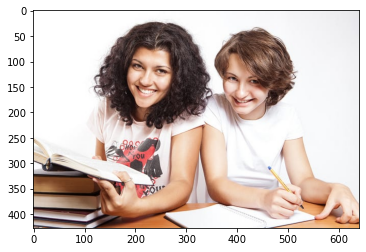

In [55]:
reader = JPGReader()
reader.set_path("/Users/huan/Desktop/face/test1.jpeg")
reader.read()
reader.show()

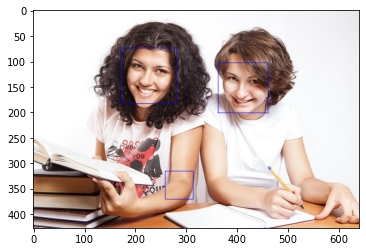

In [56]:
plt.imshow(face_finder.draw(reader.read()))